In [1]:
from pyopenms import*
with open("D:/2/hassnaa/الفرقة الرابعة/الفصل الأول/تقنيات/Fusion_180220_16.mzML") as f:
    for x in range(1000):
        print(f.readline().strip())

<?xml version="1.0" encoding="utf-8"?>
<indexedmzML xmlns="http://psi.hupo.org/ms/mzml" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xsi:schemaLocation="http://psi.hupo.org/ms/mzml http://psidev.info/files/ms/mzML/xsd/mzML1.1.2_idx.xsd">
<mzML xmlns="http://psi.hupo.org/ms/mzml" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xsi:schemaLocation="http://psi.hupo.org/ms/mzml http://psidev.info/files/ms/mzML/xsd/mzML1.1.0.xsd" id="Fusion_180220_16" version="1.1.0">
<cvList count="2">
<cv id="MS" fullName="Proteomics Standards Initiative Mass Spectrometry Ontology" version="4.1.56" URI="https://raw.githubusercontent.com/HUPO-PSI/psi-ms-CV/master/psi-ms.obo"/>
<cv id="UO" fullName="Unit Ontology" version="09:04:2014" URI="https://raw.githubusercontent.com/bio-ontology-research-group/unit-ontology/master/unit.obo"/>
</cvList>
<fileDescription>
<fileContent>
<cvParam cvRef="MS" accession="MS:1000579" name="MS1 spectrum" value=""/>
<cvParam cvRef="MS" accession="MS:1000580" name

<binary>eJwc13c8V98fB3AreySphGyyZZb5MRKyS8kuIiNZ2SMjJLNEFCkkhDK+VkgkFYoIWZGRZEZW+L38/no+zvmc87733HPO+5yP8Srd5t1wH4JK2cJWKly43k30EDqoVJNmQY3bpzgedPgQDJxcZB7B8nN3TmfD64bVF/Ng8vlRn0JI50IdXwIn46RzyuDhOuuaSli0fvtzLcywzZxpgLM1bcTN8AHHv4Ot8FmSiFgbrM0tdOvd8iFMkRPdHYCP/UwqRnbLW4W9P+Cru6QbU5BdwYLtN6RbrlBegLfr915chqnpLuFrUPr+cO4/aJ2q2Eq07UNgffbgFxm0/7BJSwXDzbQmMuBzis8UT6Bni6nQU9ifMqZbAId9r14rhqEu60ml8K17ZPl/8Fn0/t4aKPoye70eGs9IsTXBQ3Jvld/ttl+wuPgRxlgvhH+Cst8jnn6BNz0Ov++FPgdezgxAujYt+u9Q8+6oxDjkcQk48xPmnjvg/Ru2GZfeX4D3bQxqlyHVjdmhNcj17ofWP/idKsKZaMeHoG7FF08GDZvfvaCEeetUcwbEvgSSExqMZ+GJmBBpU6g7W3veAipeWve3gVTTcpl2sDTUp/EKlBepGneBWT/XKdzh+H+KwtchReoNfb/d9rfeugfBXzqxemHwuc0Xt0ioH82aHAM/NdpVxkOGvthP6+S+hO1+peUtqDs3f4iEwpfwd3+2Ejnc1jt/iRpeTqONoodCq28K90F9B//PB+DnacmVw7A8JfEwx24/pdMqPDBtldxOAGY0NUULw18cP9L56HwJs8MijYLw2wufKVFYeq+JThJej9srLQu571uZycNXFUU3lKHq5NZTNVgmaNCuCRlvPP6jAy2UOuz1YXI1d5wxrNXyLTsHP/3q6DeDMSoRHkb7fAnP+nnTTaBAVEvjBUih5ThtCbXZ6BgvwRnS0uP2cGH7vI0TPE+3E+UKOcXzSjygrp1hrzccfL6x7Q8/UT7lD9mN

In [2]:
from pyopenms import*

In [9]:
from pyopenms import*
exp =  MSExperiment()
MzMLFile().load("Fusion_180220_16.mzML",exp)
spectra = exp.getSpectra()

In [10]:
sec=exp[0]
mz,inti=sec.get_peaks()
print(mz,inti)

[ 376.22387954  376.22485886  376.22583818 ... 1494.913698   1494.92145471
 1494.92921148] [0. 0. 0. ... 0. 0. 0.]


In [105]:
fusion = spectra[14]
print(fusion)

Proteolytic Digestion with Trypsin

In [3]:
dig = ProteaseDigestion() 
dig.getEnzymeName() # Trypsin

# Read all Fasta File Record   #uniprot-organism-yeast.fasta
f = "".join([l.strip() for l in open("Scerevisiae_UPS2_1802.fasta").readlines() if l.startswith('>') == False])

# Converet to amino acid
f = AASequence.fromString(f)

result = []
dig.digest(f, result)
len(result) # 333650 peptides

333650

In [7]:
print(result[14].toString())

SMNVPIDMNEIK


In [106]:
tsg = TheoreticalSpectrumGenerator()
theo_spectrum = MSSpectrum()
p = tsg.getParameters()
p.setValue("add_y_ions", "true")
p.setValue("add_b_ions", "true")              
p.setValue("add_metainfo", "true")                          
tsg.setParameters(p)   

peptide = result[14]
tsg.getSpectrum(theo_spectrum, peptide, 1, 2)

221.14163208007812
1442.8853759765625


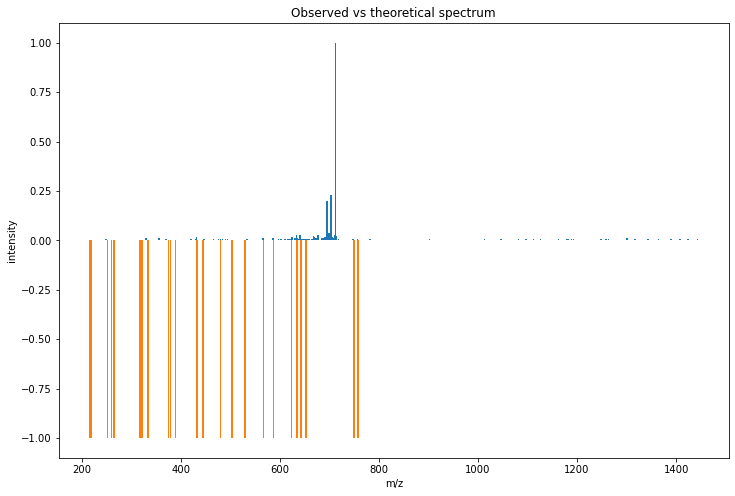

In [107]:
import numpy as np
from matplotlib import pyplot as plt
def mirror_plot(obs_mz, obs_int, theo_mz, theo_int, title):
    obs_int = [element / max(obs_int) for element in obs_int] # relative intenstiy
    theo_int = [element * -1 for element in theo_int] # invert the intensity for the mirror plot
    plt.figure(figsize=(12,8))
    plt.bar(obs_mz, obs_int, width = 3.0)
    plt.bar(theo_mz, theo_int, width = 3.0)
    plt.title(title)
    plt.ylabel('intensity')
    plt.xlabel('m/z')
obs_mz, obs_int = fusion.get_peaks()
# The mass-to-charge of our observed spectrum ranges from 200 - 800 m/z

print(min(obs_mz)) # 212.012451171875
print(max(obs_mz)) # 795.2837524414062

# We filter the peaks of the theoretical spectrum to fit the range (to reduce image complexity)

theo_mz, theo_int = [], []
for mz, intensity in zip(*theo_spectrum.get_peaks()):
    if mz >= 200.0 and mz <= 800.0:
        theo_mz.append(mz)
        theo_int.append(intensity)
title = 'Observed vs theoretical spectrum'
mirror_plot(obs_mz, obs_int, theo_mz, theo_int, title)

In [108]:
alignment = []
spa = SpectrumAlignment()
p = spa.getParameters()
# use 0.5 Da tolerance (Note: for high-resolution data we could also use ppm by setting theis_relative_tolerance value to true)
p.setValue("tolerance", 0.5)
p.setValue("is_relative_tolerance", "false")
spa.setParameters(p)
# align both spectra
spa.getSpectrumAlignment(alignment, theo_spectrum, fusion)

In [109]:
# Print matching ions and mz from theoretical spectrum
print("Number of matched peaks: " + str(len(alignment)))
print("ion\ttheo. m/z\tobserved m/z")
for theo_idx, obs_idx in alignment:
    ion_name = theo_spectrum.getStringDataArrays()[0][theo_idx].decode()
    ion_charge = theo_spectrum.getIntegerDataArrays()[0][theo_idx]
    print(ion_name + "\t" + str(ion_charge) + "\t"
          + str(theo_spectrum[theo_idx].getMZ())
          + "\t" + str(fusion[obs_idx].getMZ()))

Number of matched peaks: 6
ion	theo. m/z	observed m/z
y7++	2	431.72058083662097	431.246337890625
y8++	2	480.24696294827095	480.0096130371094
b6+	1	642.327961696071	642.4096069335938
y11++	2	652.322876696071	652.70556640625
b7+	1	757.354905855571	756.8814086914062
y9+	1	1058.555063716871	1058.544677734375


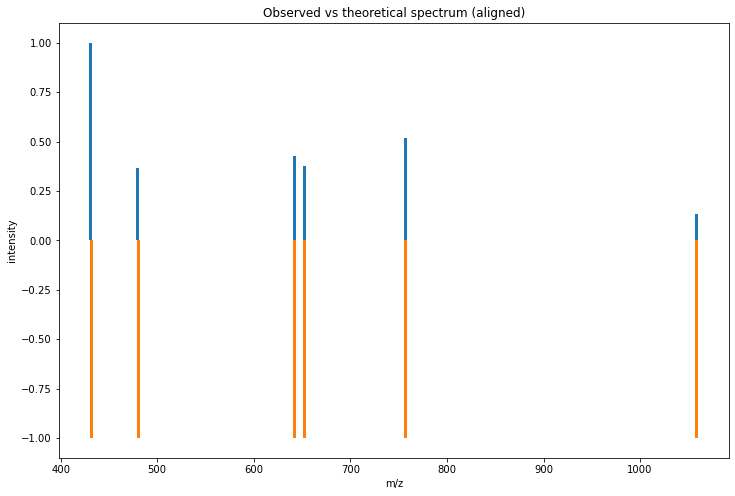

In [110]:
theo_mz, theo_int, obs_mz, obs_int = [], [], [], []
for theo_idx, obs_idx in alignment:
    theo_mz.append(theo_spectrum[theo_idx].getMZ())
    theo_int.append(theo_spectrum[theo_idx].getIntensity())
    obs_mz.append(fusion[obs_idx].getMZ())
    obs_int.append(fusion[obs_idx].getIntensity())
title = 'Observed vs theoretical spectrum (aligned)'
mirror_plot(obs_mz, obs_int, theo_mz, theo_int, title)